# Notebook de Análise Exploratória e Verificação de Loaders

## Imports

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from src.data.loader import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')

## Testes

### Fashion Mnist

In [ ]:
loader = DataLoader(data_root="../data/raw")
X_train, y_train, X_test, y_test = loader.load_fashion_mnist(test_samples=2000, random_state=42)

print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")
print(f"Classes: {np.unique(y_train)}")
print(f"Distribuição das classes: {np.bincount(y_train)}")

Carregando Fashion-MNIST com 60000 amostras de treino e 2000 amostras de teste.
Fashion-MNIST carregado com sucesso. X_train: (60000, 784), X_test: (2000, 784)
Treino: (60000, 784)
Teste: (2000, 784)
Classes: [0 1 2 3 4 5 6 7 8 9]
Distribuição das classes: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


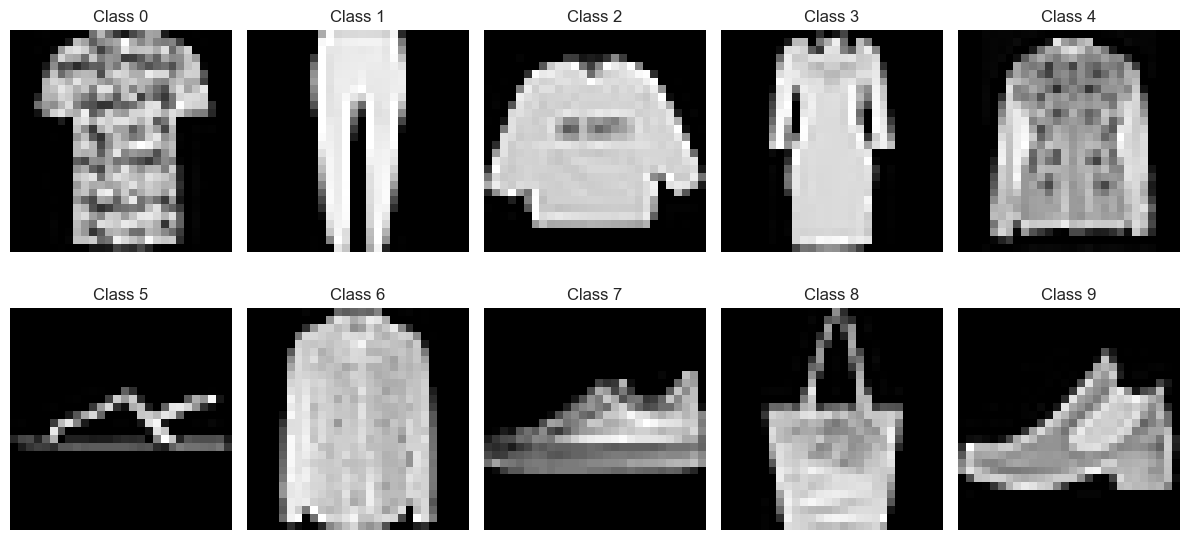

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Colon

In [4]:
try:
    X_train_c, X_test_c, y_train_c, y_test_c = loader.load_colon()
    print("\nColon carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar Colon: {e}")

Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Extraídos 62 casos
Nó de label: SampleType
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1]
Conjunto de dados COLON-TUMOR carregado com sucesso. X_train: (43, 2000), X_test: (19, 2000)
Features: 2000, Samples: 62, Classes: 2

Colon carregado com sucesso!


### Testando Todos

In [ ]:
datasets = ['fashion-mnist', 'colon', 'leukemia', 'cns', 'mll', 'ovarian']

for dataset_name in datasets:
    try:
        X_train, X_test, y_train, y_test = loader.load_dataset(dataset_name)
        print(f"✓ {dataset_name:20s} - Train: {X_train.shape}, Test: {X_test.shape}, Classes: {len(np.unique(y_train))}")
    except Exception as e:
        print(f"✗ {dataset_name:20s} - Erro: {str(e)[:50]}")
  

Carregando Fashion-MNIST com 60000 amostras de treino e 10000 amostras de teste.
Fashion-MNIST carregado com sucesso. X_train: (60000, 784), X_test: (10000, 784)
✓ fashion-mnist        - Train: (60000, 784), Test: (60000,), Classes: 256
Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Extraídos 62 casos
Nó de label: SampleType
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1]
Conjunto de dados COLON-TUMOR carregado com sucesso. X_train: (43, 2000), X_test: (19, 2000)
Features: 2000, Samples: 62, Classes: 2
✓ colon                - Train: (43, 2000), Test: (43,), Classes: 36817
Carregando conjunto de dados de microarray: ALL-AML_LEUKEMIA
Formato Elvira detectado
Parseando arquivo Elvira: AMLALL_Test.dbc
Número de casos esperados: 34
Encontrados 7130 nós/variáveis
Extraídos 34 casos
Nó de label: SampleType
Matriz de dados: X=(34, 7129), y=(